In [1]:
import seaborn as sns
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\LENOVO\Downloads\heart_disease_classification_dataset.csv',header=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [5]:
df['trestbps'].mean()

131.7123745819398

In [6]:
df['chol'].mean()

246.31788079470198

In [7]:
df['thalach'].mean()

149.86577181208054

In [8]:
df['trestbps'].fillna(value=df['trestbps'].mean(),inplace=True)

In [9]:
df['chol'].fillna(value=df['chol'].mean(),inplace=True)

In [10]:
df['thalach'].fillna(value=df['thalach'].mean(),inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 33.3+ KB


In [12]:
df=pd.get_dummies(df,columns=["sex","target"],drop_first=True)

In [13]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_male,target_yes
0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1,1
2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,0,1
3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1,1
4,57,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,0,1


In [14]:
x=df.loc[:,df.columns !="target_yes"]

In [15]:
x.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_male
0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,0
3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,0


In [16]:
y=df["target_yes"]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [19]:
from sklearn import tree

In [20]:
clf_tree=tree.DecisionTreeClassifier(max_depth=3)

In [21]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
y_pred_train=clf_tree.predict(x_train)

In [23]:
y_pred_test=clf_tree.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [25]:
confusion_matrix(y_train,y_pred_train)

array([[ 92,  19],
       [ 18, 113]], dtype=int64)

In [26]:
confusion_matrix(y_test,y_pred_test)

array([[21,  6],
       [ 8, 26]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred_test)

0.7704918032786885

In [28]:
accuracy_score(y_train,y_pred_train)

0.8471074380165289

In [29]:

from IPython.display import Image

In [30]:
import pydotplus

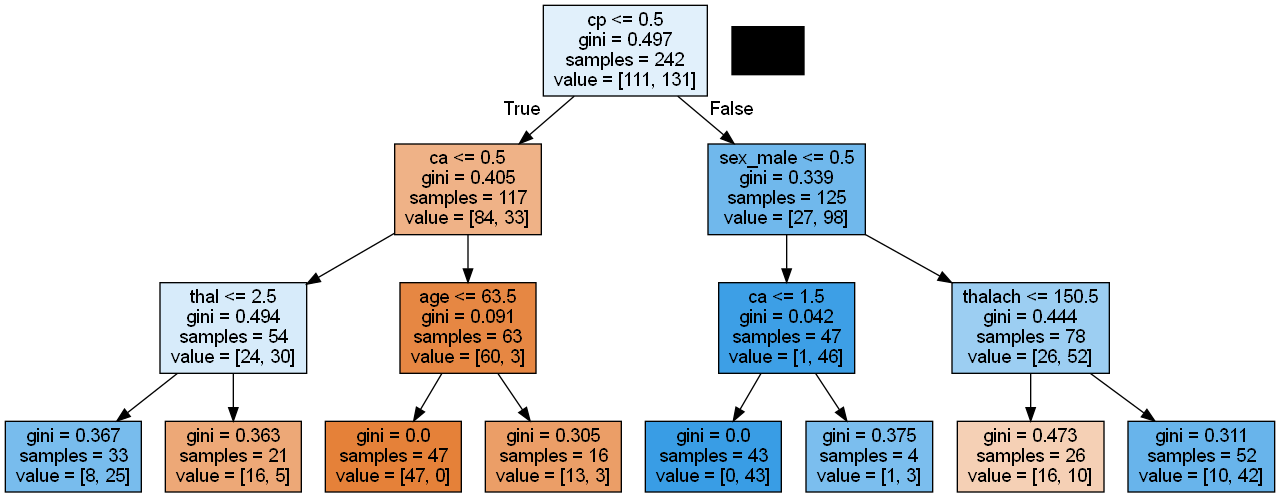

In [31]:
clf_tree=tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(x_train,y_train)
dot_data = tree.export_graphviz(clf_tree,out_file=None,feature_names=x_train.columns,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

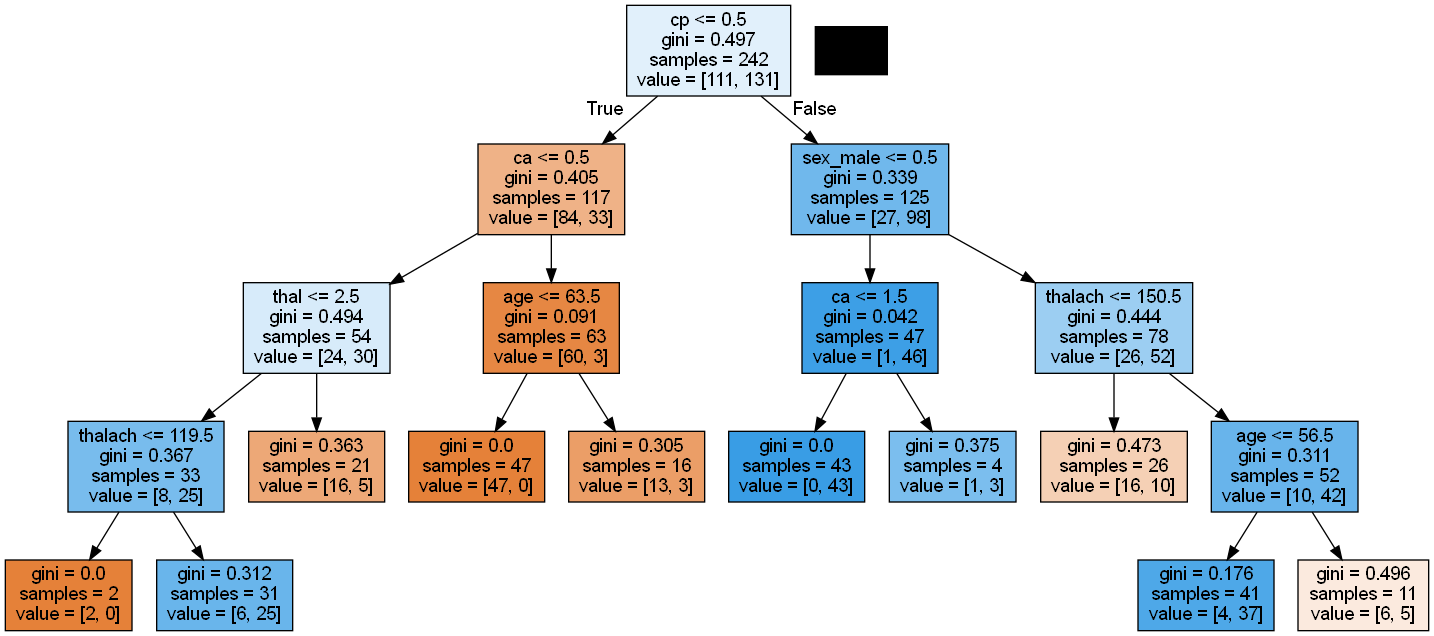

In [32]:
clf_tree2=tree.DecisionTreeClassifier(min_samples_split=30,max_depth=4)
clf_tree2.fit(x_train,y_train)
dot_data = tree.export_graphviz(clf_tree2,out_file=None,feature_names=x_train.columns,filled=True)
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [33]:
accuracy_score(y_test,clf_tree2.predict(x_test))

0.7540983606557377

In [34]:
from sklearn.ensemble import BaggingClassifier

In [35]:
clf_full=tree.DecisionTreeClassifier()

In [36]:
bag_clf=BaggingClassifier(base_estimator=clf_full,n_estimators=1000,
                         bootstrap=True,n_jobs=-1,random_state=42)

In [37]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [38]:
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[20,  7],
       [ 4, 30]], dtype=int64)

In [39]:
accuracy_score(y_test,bag_clf.predict(x_test))

0.819672131147541

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_clf=RandomForestClassifier(n_estimators=1000,
                         bootstrap=True,n_jobs=-1,random_state=42)

In [42]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [43]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[22,  5],
       [ 4, 30]], dtype=int64)

In [44]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.8524590163934426

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
gb_clf=GradientBoostingClassifier()

In [47]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [48]:
accuracy_score(y_test,gb_clf.predict(x_test))

0.8032786885245902

In [49]:
gb_clf2=GradientBoostingClassifier(learning_rate=0.02,n_estimators=1000,max_depth=1)

In [50]:
gb_clf2.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [51]:
accuracy_score(y_train,gb_clf2.predict(x_train))

0.8842975206611571

In [52]:
accuracy_score(y_test,gb_clf2.predict(x_test))

0.8524590163934426

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
ada_clf=AdaBoostClassifier(learning_rate=0.2,n_estimators=5000)

In [59]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=5000)

In [60]:
accuracy_score(y_test,ada_clf.predict(x_test))

0.8688524590163934

In [61]:
accuracy_score(y_train,ada_clf.predict(x_train))

1.0

In [62]:
import xgboost as xgb


In [98]:
xgb_clf=xgb.XGBClassifier(max_depth= 5 ,n_estimators=1000,learning_rate=0.2,n_jobs=-1)

In [99]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [100]:
accuracy_score(y_test,xgb_clf.predict(x_test))

0.819672131147541

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

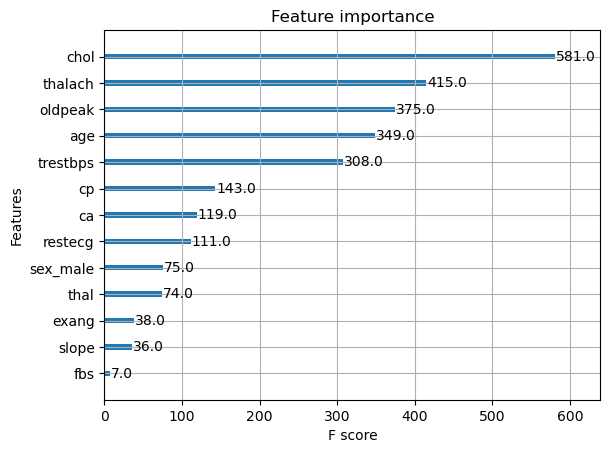

In [101]:
xgb.plot_importance(xgb_clf)